# Introdução ao Sensoriamento Remoto Aplicado à Gestão de Recursos Marinhos

## Modulo 1 D2
### Introdução ao Uso das Bibliotecas

_**Autores:** Eligio Maure_

## Conteudos
- [numpy](https://numpy.org/) – operações numéricas e matemáticas
- [pandas](https://pandas.pydata.org/) – manipulação de tabelas
- [xarray](https://docs.xarray.dev/en/stable/) – dados multidimensionais (NetCDF, HDF)
- [matplotlib](https://matplotlib.org/) – visualizações básicas (gráficos, mapas)
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/) – criação de mapas
- [scipy](https://scipy.org/) – estatística e funções científicas adicionais
- [rasterio](https://rasterio.readthedocs.io/en/stable/) – leitura/manipulação de dados geoespaciais (GeoTIFFs)
- [requests](https://requests.readthedocs.io/en/latest/) – acesso a dados via HTTP/REST (NASA, Copernicus, JAXA)

## Objetivos de Aprendizagem
Ao terminar este notebook, você será capaz de:
* Importar e usar as bibliotecas fundamentais para análise de dados em Python
* Ler ficheiros locais ou diretamente da internet
* Fazer visualizações básicas e interpretar imagens de satélite


## Uso das Bibliotecas

<!-- Abrir no Colab -->
<div style="display: flex; align-items: center;">
	<a target="_blank"
			href="https://colab.research.google.com/github/Elgyii/Treinamento-em-Sensoriamento-Remoto-Aplicado-ECOPs-2025/blob/main/modulo1/modulo1d2.ipynb">
		<img src="https://www.tensorflow.org/images/colab_logo_32px.png"
					style="vertical-align: -8px; margin-right: 10px;" />
		<strong>Abrir no Google Colab</strong>
	</a>
</div>

### numpy
- criar um array e calcular média/desvio

In [1]:
import numpy as np
print(np.__version__)

a = np.array([25, 27, 26])
print("Array:", a)
print("Temperatura Média:", a.mean())
print("Desvio Padrão:", a.std())


2.3.2
Array: [25 27 26]
Temperatura Média: 26.0
Desvio Padrão: 0.816496580927726


### pandas
- criar uma tabela e calcular média/desvio

[⬆️ Voltar ao topo](#Conteudos)

In [2]:
import pandas as pd

# criar a tabela
dados = {"Dia": ["Segunda", "Terca", "Quarta"], "Temp": [25, 27, 26]}
df = pd.DataFrame(dados)
print(df)

print("Temperatura Média:", df["Temp"].mean())
print("Desvio Padrão:", df["Temp"].std())


       Dia  Temp
0  Segunda    25
1    Terca    27
2   Quarta    26
Temperatura Média: 26.0
Desvio Padrão: 1.0


### xarray
- Manipulação de dados com muitas dimensões

[⬆️ Voltar ao topo](#Conteudos)

In [3]:
import xarray as xr

# como criar dados
dados = xr.DataArray(
    np.random.rand(3, 4),
    dims=("lat", "lon"),
    coords={"lat": [-30, -20, -10], "lon": [20, 30, 40, 50]},
    name="chl"
)
# como selecionar um valor 
print("Valor em lat=-10, lon=40:", float(dados.sel(lat=-10, lon=40)))
dados


Valor em lat=-10, lon=40: 0.6946063598219981


<xarray.DataArray 'chl' (lat: 3, lon: 4)> Size: 96B
array([[0.5499167 , 0.26270983, 0.03845392, 0.32766267],
       [0.63461765, 0.43746364, 0.85782219, 0.25194204],
       [0.34575972, 0.17103728, 0.69460636, 0.20168038]])
Coordinates:
  * lat      (lat) int64 24B -30 -20 -10
  * lon      (lon) int64 32B 20 30 40 50

In [4]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### matplotlib
- Criação de gráficos e imagens

[⬆️ Voltar ao topo](#Conteudos)

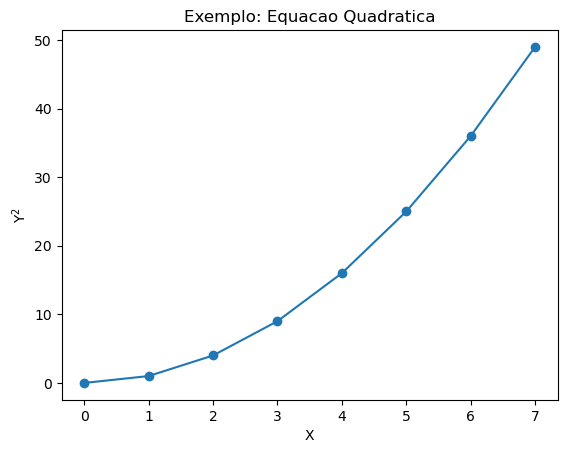

In [5]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [i**2 for i in x]

plt.plot(x, y, marker="o")
plt.title("Exemplo: Equacao Quadratica")
plt.xlabel("X")
plt.ylabel("Y$^2$")
plt.show()

### cartopy
- Criação de mapas

[⬆️ Voltar ao topo](#Conteudos)

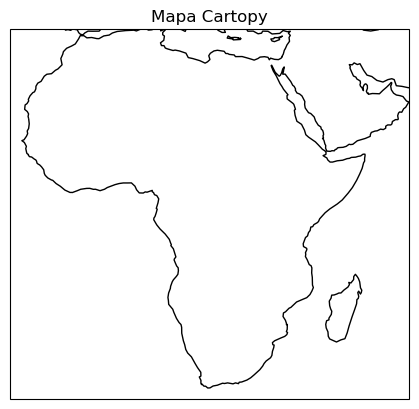

In [6]:
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-20, 60, -30, 30]) 
plt.title("Mapa Cartopy")
plt.show()


## Obtencao de dados online
🌊 Exemplo 1 — Clorofila ESA

[⬆️ Voltar ao topo](#Conteudos)

<xarray.Dataset> Size: 1GB
Dimensions:             (time: 1, lat: 4320, lon: 8640)
Coordinates:
  * lat                 (lat) float64 35kB 89.98 89.94 89.9 ... -89.94 -89.98
  * lon                 (lon) float64 69kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time                (time) datetime64[ns] 8B 2022-12-01
Data variables:
    MERIS_nobs_sum      (time, lat, lon) float32 149MB ...
    MODISA_nobs_sum     (time, lat, lon) float32 149MB ...
    OLCI-A_nobs_sum     (time, lat, lon) float32 149MB ...
    OLCI-B_nobs_sum     (time, lat, lon) float32 149MB ...
    SeaWiFS_nobs_sum    (time, lat, lon) float32 149MB ...
    VIIRS_nobs_sum      (time, lat, lon) float32 149MB ...
    chlor_a             (time, lat, lon) float32 149MB ...
    chlor_a_log10_bias  (time, lat, lon) float32 149MB ...
    chlor_a_log10_rmsd  (time, lat, lon) float32 149MB ...
    crs                 int32 4B ...
    total_nobs_sum      (time, lat, lon) float32 149MB ...
Attributes: (12/51)
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    creator_name:                      Plymouth Marine Laboratory
    ...                                ...
    stop_date:                         31-DEC-2022 23:59:00.000000
    time_coverage_start:               202212010000Z
    time_coverage_end:                 202212312359Z
    history:                           Source data were: ESACCI-OC-L3S-OC_PRO...
    netcdf_file_type:                  NETCDF4_CLASSIC
    id:                                ESACCI-OC-L3S-CHLOR_A-MERGED-1M_MONTHL...

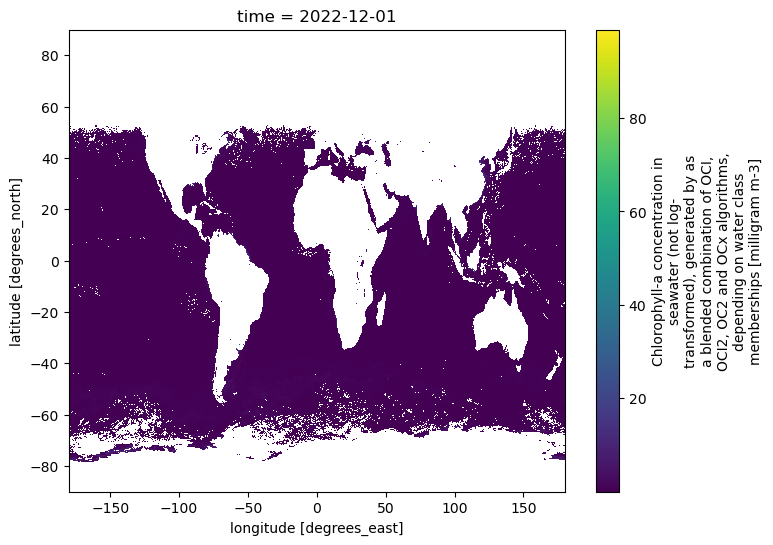

In [7]:
import requests
import io

# Clorofila ESACCI (dados mensais, 4 km, Dec 2022)
url = "https://dap.ceda.ac.uk/neodc/esacci/ocean_colour/data/v6.0-release/"\
    "geographic/netcdf/chlor_a/monthly/v6.0/2022/ESACCI-OC-L3S-CHLOR_A-MERGED"\
        "-1M_MONTHLY_4km_GEO_PML_OCx-202212-fv6.0.nc"

# nome do ficheiro
fname = "ESACCI-OC-L3S-CHLOR_A-MERGED-1M_MONTHLY_4km_GEO_PML_OCx-202212-fv6.0.nc.nc"

# Baixar os data
r = requests.get(url)
r.raise_for_status()
with open(fname, "wb") as f:
    f.write(r.content)

# leiture
chl = xr.open_dataset(fname, engine="netcdf4")
# Vizualizar a clorofila
chl['chlor_a'].plot(size=6, cmap="viridis")
chl


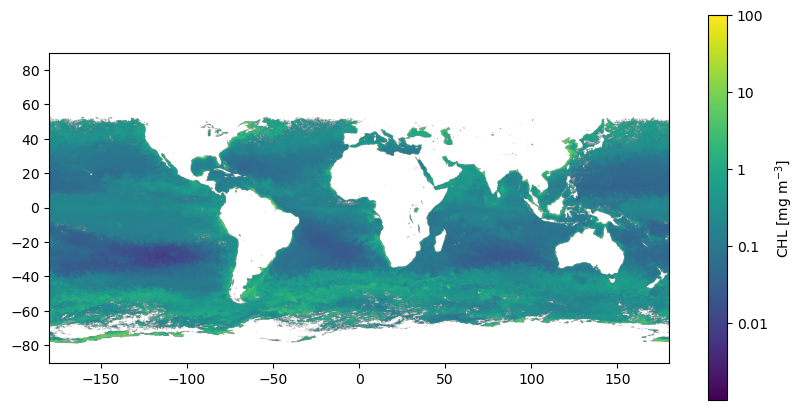

In [ ]:
dados = np.log10(chl['chlor_a'])
plt.figure(figsize=(10, 5))
m = plt.imshow(dados.isel(time=0), extent=[-180, 180, -90, 90])
cbar = plt.colorbar(m)
cbar.set_label("CHL [mg m$^{-3}$]")
cbar.set_ticks([-2, -1, 0, 1, 2])
cbar.set_ticklabels([0.01, 0.1, 1, 10, 100])

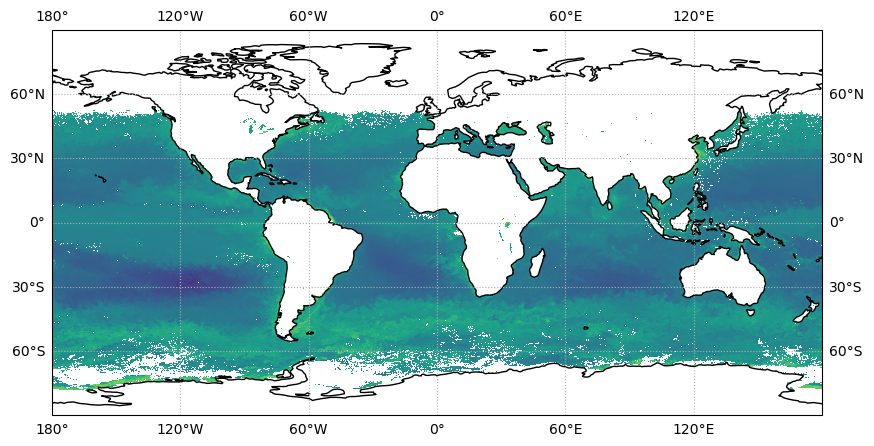

In [16]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()		
ax.gridlines(draw_labels=True, linestyle=':')
ax.pcolormesh(chl.lon, chl.lat, dados.isel(time=0))

🌊 Exemplo 2 — SST AVHRR (NOAA)

[⬆️ Voltar ao topo](#Conteudos)

<xarray.Dataset> Size: 3GB
Dimensions:                    (lat: 4320, nv: 2, lon: 8640, time: 1)
Coordinates:
  * lat                        (lat) float32 17kB 89.98 89.94 ... -89.94 -89.98
  * lon                        (lon) float32 35kB -180.0 -179.9 ... 179.9 180.0
  * time                       (time) datetime64[ns] 8B 2023-01-01T02:32:27
Dimensions without coordinates: nv
Data variables: (12/15)
    crs                        int32 4B ...
    lat_bounds                 (lat, nv) float32 35kB ...
    lon_bounds                 (lon, nv) float32 69kB ...
    time_bounds                (time, nv) datetime64[ns] 16B ...
    aerosol_dynamic_indicator  (time, lat, lon) float64 299MB ...
    dt_analysis                (time, lat, lon) float64 299MB ...
    ...                         ...
    sea_ice_fraction           (time, lat, lon) float64 299MB ...
    sea_surface_temperature    (time, lat, lon) float64 299MB ...
    sses_bias                  (time, lat, lon) float64 299MB ...
    sses_standard_deviation    (time, lat, lon) float64 299MB ...
    sst_dtime                  (time, lat, lon) float64 299MB ...
    wind_speed                 (time, lat, lon) float64 299MB ...
Attributes: (12/75)
    Conventions:                             CF-1.6, ACDD-1.3
    title:                                   AVHRR Pathfinder Version 5.3 L3-...
    summary:                                 This netCDF-4 file contains sea ...
    references:                              http://pathfinder.nodc.noaa.gov ...
    institution:                             NCEI
    history:                                 smigen_both ifile=2023001.b4kd1-...
    ...                                      ...
    ncei_template_version:                   NCEI_NetCDF_Grid_Template_v2.0
    program:                                 NOAA Climate Data Record (CDR) P...
    cdr_program:                             NOAA Climate Data Record Program...
    cdr_variable:                            sea_surface_temperature
    cdr_id:                                  gov.noaa.ncdc:C00983
    DODS_EXTRA.Unlimited_Dimension:          time

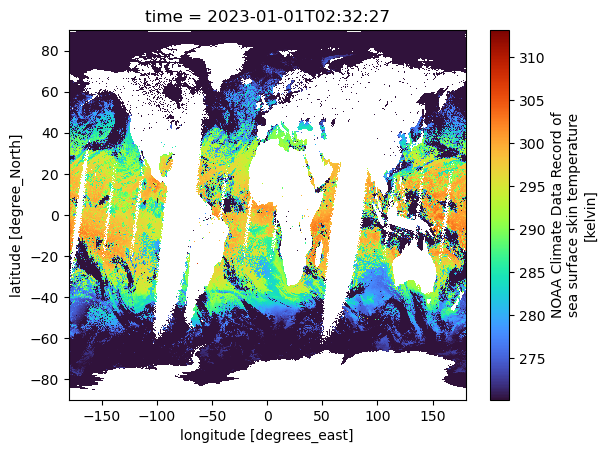

In [ ]:
# NOAA PATHFINDER SST v5.3 (Jan 1, 2023)
url = "https://www.ncei.noaa.gov/thredds-ocean/dodsC/"\
  "pathfinder/Version5.3/L3C/2023/data/20230101023227-NCEI-"\
    "L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2023001_night-v02.0-fv01.0.nc"

sst = xr.open_dataset(url, engine="netcdf4")
sst['sea_surface_temperature'].isel(time=0).plot(cmap="turbo")
sst


<div class="alert alert-info" role="alert">

**Nota Importante**:  
Para acessar alguns repositórios de dados avançados, vai precisar se cadastrar (criar conta gratuita) no seguintes portais:  
1. [NASA Earthdata Search](https://search.earthdata.nasa.gov/search)  
2. [Copernicus Open Access Hub](https://data.marine.copernicus.eu/)  
3. [JAXA G-Portal](https://gportal.jaxa.jp/gpr/)  



### Consolidação

1. **Importação**  
   - Importe `numpy`, `xarray` e `matplotlib`
   - Verifique e imprima a versão instalada de cada biblioteca

2. **Leitura de Dados**  
   - Repita o exercício de leitura de ficheiros NetCDF
   - Liste todas as variáveis disponíveis no dataset (use `.data_vars`)  

3. **Subset Espacial**  
   - Selecione uma variável (ex.: temperatura da superfície ou clorofila)
   - Extraia uma região geográfica definida por latitude/longitude

4. **Visualização**  
   - Faça um mapa de uma variável a sua escolha
   - Acrescente título e legenda para facilitar a interpretação

5. **Reflexão Crítica**  
   - Muitas vezes, mapas de clorofila aparecem `sem variação de cor` ou somente com uma cor uniforme  
   - **Questão:** Por que isso acontece?  
     - (i) valores fora da escala de cores padrão  
     - (ii) necessidade de usar escala logarítmica  
     - (iii) ausencia de dados (*NaN*)  
   - `matplotlib` oferece `vmin/vmax` ou normalização `norm=LogNorm()` para ajudar a ajustar visualização  


[⬆️ Voltar ao topo](#Conteudos)

Dias 4-5 (Trabalho independente)
- Notebook de consolidação com boas práticas:
- Estrutura: imports, leitura, análise, visualização, conclusões
- Mapa da região de interesse
- Comentários no código
- Nomeação clara de variáveis
- Use `plt.savefig()` para exportar images
- Exporte o ambiente usando `environment.yml` ou `requirements.txt``

## Alguns Recursos

- [Project Pythia Foundations](https://foundations.projectpythia.org/)
- [Pangeo Gallery](https://gallery.pangeo.io/)
- [NASA OB.DAAC Tutorials](https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials)
- [xarray](https://tutorial.xarray.dev/)